## Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from utils import *
from implementations import *
%load_ext autoreload
%autoreload 2

## Load the data

In [22]:
y, X, ids = load_csv_data(path="data/train.csv")
print("Input data shape", X.shape)
print("Labels data shape", y.shape)

Input data shape (250000, 30)
Labels data shape (250000,)


In [23]:
y[np.where(y == -1)] = 0
y

array([1., 0., 0., ..., 1., 0., 0.])

In [12]:
def deal_with_meaningless_value(tx, meaningless_value):
    '''
    ##### Input:
    tx: features --- np.array(N,M)
    meaningless_V: meaningless value in tx i.e. -999 --- double
    ##### Output:
    new_tx: new features matrix after dealing the meaningless value
    '''
    # we compute the mean of one column to replace the meaningless value
    tx_copy = tx.copy()
    num_cols = tx.shape[1]
    for col in range(num_cols):
        col_tmp = tx_copy[:, col]
        col_tmp = np.delete(col_tmp, np.where(col_tmp == meaningless_value))
        col_mean = np.mean(col_tmp)
        tx_copy[:, col] = np.where(tx[:, col] == meaningless_value, col_mean, tx[:, col])
    return tx_copy

In [24]:
X = deal_with_meaningless_value(X, -999)
X_std,_,_=standardize(X)
X_sincos = np.c_[X_std,np.sin(X), np.cos(X)]

In [25]:
X_sincos

array([[ 0.9292726 ,  0.04457539,  0.51509592, ...,  0.32479628,
        -0.78593303,  0.9211916 ],
       [ 1.15822487,  0.21896718,  0.5702067 , ...,  0.99992985,
         0.99999875, -0.62326156],
       [ 0.75999168,  1.17081027,  0.80171682, ...,  0.99992985,
         0.99999875,  0.96411608],
       ...,
       [ 0.59285022,  0.13497623,  0.29102494, ...,  0.99992985,
         0.99999875, -0.40730461],
       [ 0.48578774, -0.28450975,  0.21941557, ...,  0.99992985,
         0.99999875,  1.        ],
       [ 0.75999168,  0.25960731,  0.2399904 , ...,  0.99992985,
         0.99999875,  1.        ]])

In [26]:
x_tr, x_val, y_tr, y_val = split_data(X_sincos, y, 0.8)

print("Training data shapes", x_tr.shape, y_tr.shape)
print("Validation data shapes", x_val.shape, y_val.shape)

Training data shapes (200000, 90) (200000,)
Validation data shapes (50000, 90) (50000,)


In [27]:
x_tr = add_bias_term(x_tr)
x_val = add_bias_term(x_val)

print("Training data shapes", x_tr.shape)
print("Validation data shapes", x_val.shape)

Training data shapes (200000, 91)
Validation data shapes (50000, 91)


## Train

In [29]:
from implementations import *
weights, loss = reg_logistic_regression(
    y_tr, x_tr, 0, np.zeros(x_tr.shape[1]), max_iters=3000, gamma=0.2)

Iteration 1/3000: loss=0.6931471805599453,gamma=0.25
Iteration 201/3000: loss=0.48883762234541683,gamma=1
Iteration 401/3000: loss=0.48271023840708926,gamma=0.25
Iteration 601/3000: loss=0.48076621847946727,gamma=0.5
Iteration 801/3000: loss=0.47985240889731867,gamma=0.25
Iteration 1001/3000: loss=0.47933433300573103,gamma=0.5
Iteration 1201/3000: loss=0.47900909433432187,gamma=0.25
Iteration 1401/3000: loss=0.4787871964170693,gamma=0.25
Iteration 1601/3000: loss=0.4786293189411,gamma=0.25
Iteration 1801/3000: loss=0.47851365570372395,gamma=0.25
Iteration 2001/3000: loss=0.47842608165954326,gamma=0.5
Iteration 2201/3000: loss=0.4783591535323103,gamma=0.5
Iteration 2401/3000: loss=0.47830695864440165,gamma=0.5
Iteration 2601/3000: loss=0.47826530963629915,gamma=0.25
Iteration 2801/3000: loss=0.4782315228809228,gamma=0.5


In [30]:
print("Training score", compute_score(y_tr, x_tr, weights))
print("Validation score", compute_score(y_val, x_val, weights))

Training score 0.76901
Validation score 0.76828


In [31]:
f1_score(y_val, x_val, weights)

0.6311835487362323

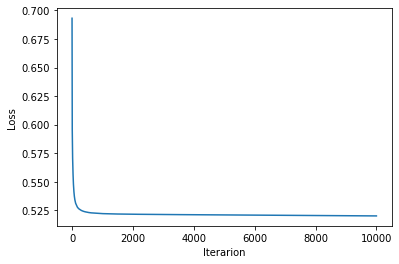

In [10]:
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Iterarion")
plt.ylabel("Loss")
plt.show()

## Testing

In [17]:
_, XTest, idsTest = load_csv_data(path="data/test.csv")
XTest[XTest == -999] = 0
print("Input data shape", XTest.shape)
# print("Labels data shape", y.shape)

Input data shape (568238, 30)


In [18]:
XTest = add_bias_term(standardize(XTest)[0])
XTest.shape

(568238, 31)

In [19]:
yTest = np.array([predictions(x, weights) for x in XTest])

In [20]:
yTest[np.where(yTest == 0)] = -1
print(yTest)

[-1 -1 -1 ...  1 -1 -1]


In [21]:
create_csv_submission(idsTest, yTest, "03.csv")

In [22]:
(yTest==1).sum()/len(yTest)

0.23897381026964054